<a href="https://colab.research.google.com/github/AFNANAMIN/AI_Freelancing/blob/master/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/task2/

/content/drive/My Drive/task2


In [4]:
!ls

w1.txt	w2.txt	X_test.csv  X_train.csv  Y_test.csv  Y_train.csv


In [10]:
train=pd.read_csv('X_train.csv',header=None)
test=pd.read_csv('X_test.csv',header=None)
label_train=pd.read_csv('Y_train.csv',names=['target'])
label_test=pd.read_csv('Y_test.csv',names=['target'])
merged_train = train.join(label_train)
merged_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,target
0,11,3,0,4,-1.000000,-1.0,-1.000000,-1.00,-1.0,6,0,0,0,0,0,0,0,0,0,4,1,2,77,4,7,9,92,14,31,19,121,0,79,1,0,7,9,0,18,0,...,0,0,0,0,0,1,0,0,0,0,0,14,1,0,0,0,3,0,0,0,0,0,0,6,0,0,0.000000,0.000000,0,0,0,0,0.000000,647,5,36.990000,2,647,1553.000000,3
1,14,4,1,6,-1.000000,1.0,-1.000000,-1.00,-1.0,6,5,0,0,0,1,2,0,1,0,4,1,2,223,6,11,16,127,14,31,37,149,0,226,6,2,11,16,0,25,0,...,0,0,0,0,0,1,0,0,0,0,0,14,1,0,0,20,3,0,0,0,0,1,0,8,1,0,39.000000,1.000000,0,0,0,1,3.000000,1143,5,36.990000,2,1143,1553.000000,0
2,14,4,2,6,-1.000000,1.0,0.000000,-1.00,-1.0,6,5,0,0,0,1,13,0,1,0,4,1,2,225,6,22,16,127,14,31,59,171,0,228,6,2,22,16,0,26,0,...,0,0,0,0,0,1,0,0,0,0,0,14,1,22,0,20,3,0,0,0,0,1,0,6,1,11,65.500000,0.500000,1,0,0,1,1.500000,1230,5,36.990000,2,1230,1553.000000,3
3,24,9,4,10,-1.000000,0.0,0.000000,-1.00,-1.0,9,6,0,5,0,2,13,5,2,0,8,2,5,336,10,25,40,243,29,45,93,314,6,341,14,9,25,40,2,47,0,...,0,0,0,0,0,2,2,0,0,0,0,23,2,22,0,20,4,14,4,0,0,2,0,6,2,11,41.250000,0.500000,2,0,0,2,1.500000,2159,5,36.990000,2,2159,1553.000000,2
4,28,10,5,13,-1.000000,0.5,0.000000,-1.00,-1.0,9,12,0,5,0,3,13,5,2,1,8,2,5,457,12,30,53,277,29,45,105,331,6,463,15,10,30,53,2,56,0,...,0,0,0,0,0,2,2,0,0,0,0,23,2,22,0,30,4,14,4,0,0,4,0,8,3,12,39.200000,0.500000,2,0,1,2,1.600000,2586,5,36.990000,2,2586,1553.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,40,6,11,5,0.333333,0.0,0.111111,0.25,0.0,0,42,0,0,0,2,9,0,0,1,1,0,1,204,4,46,17,51,18,0,75,192,0,208,44,19,47,17,1,62,0,...,0,4,0,0,6,0,1,0,2,0,40,0,2,28,0,34,1,7,4,6,0,7,0,8,5,44,66.181818,0.244949,6,3,0,2,0.818182,1385,18,54.485322,5,1385,1156.777778,1
1196,40,6,12,5,0.333333,0.0,0.333333,0.25,0.0,0,46,0,0,0,2,12,0,0,1,1,0,1,209,4,52,18,64,18,0,82,212,0,213,44,19,53,18,1,63,0,...,0,4,0,0,6,0,1,0,2,0,40,0,2,35,0,34,1,7,4,6,0,7,0,42,6,46,73.500000,0.252315,6,4,0,2,0.833333,1473,18,54.485322,5,1473,1156.777778,0
1197,42,6,13,5,0.333333,0.0,0.333333,0.25,0.0,0,48,0,0,0,2,12,0,0,1,1,0,1,214,4,54,18,64,18,0,88,221,0,218,47,19,55,18,1,66,0,...,0,4,0,0,6,0,1,0,2,0,49,0,2,35,0,34,1,7,4,6,0,7,0,2,6,48,71.307692,0.232906,7,4,0,2,0.769231,1531,18,54.485322,5,1531,1156.777778,3
1198,43,9,14,5,0.333333,0.0,0.333333,1.00,0.0,0,49,0,0,0,2,12,0,0,1,1,0,1,277,4,54,19,145,18,0,88,334,0,282,76,19,55,19,1,71,0,...,0,4,0,0,8,0,1,0,3,0,49,0,2,35,0,34,1,7,4,6,0,7,0,31,7,48,68.000000,0.287698,7,4,0,3,0.928571,1962,18,54.485322,5,1962,1156.777778,3


In [0]:
def get_data():
    #get train data
    train_data_path ='X_train.csv'
    train = pd.read_csv(train_data_path,header=None)
    
    #get test data
    test_data_path ='X_test.csv'
    test = pd.read_csv(test_data_path,header=None)

    target=pd.read_csv('Y_train.csv',names=['target'])
    
    return train , test,target

def get_combined_data():
  #reading train data
  train , test,target = get_data()

  target = train.SalePrice
  train.drop(['SalePrice'],axis = 1 , inplace = True)

  combined = train.append(test)
  combined.reset_index(inplace=True)
  combined.drop(['index', 'Id'], inplace=True, axis=1)
  return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

In [0]:
combine=train.append(test)

In [12]:
combine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897
0,11,3,0,4,-1.0,-1.0,-1.0,-1.0,-1.0,6,0,0,0,0,0,0,0,0,0,4,1,2,77,4,7,9,92,14,31,19,121,0,79,1,0,7,9,0,18,0,...,0,0,0,0,0,0,1,0,0,0,0,0,14,1,0,0,0,3,0,0,0,0,0,0,6,0,0,0.00,0.0,0,0,0,0,0.0,647,5,36.990000,2,647,1553.000000
1,14,4,1,6,-1.0,1.0,-1.0,-1.0,-1.0,6,5,0,0,0,1,2,0,1,0,4,1,2,223,6,11,16,127,14,31,37,149,0,226,6,2,11,16,0,25,0,...,0,0,0,0,0,0,1,0,0,0,0,0,14,1,0,0,20,3,0,0,0,0,1,0,8,1,0,39.00,1.0,0,0,0,1,3.0,1143,5,36.990000,2,1143,1553.000000
2,14,4,2,6,-1.0,1.0,0.0,-1.0,-1.0,6,5,0,0,0,1,13,0,1,0,4,1,2,225,6,22,16,127,14,31,59,171,0,228,6,2,22,16,0,26,0,...,0,0,0,0,0,0,1,0,0,0,0,0,14,1,22,0,20,3,0,0,0,0,1,0,6,1,11,65.50,0.5,1,0,0,1,1.5,1230,5,36.990000,2,1230,1553.000000
3,24,9,4,10,-1.0,0.0,0.0,-1.0,-1.0,9,6,0,5,0,2,13,5,2,0,8,2,5,336,10,25,40,243,29,45,93,314,6,341,14,9,25,40,2,47,0,...,0,0,0,0,0,0,2,2,0,0,0,0,23,2,22,0,20,4,14,4,0,0,2,0,6,2,11,41.25,0.5,2,0,0,2,1.5,2159,5,36.990000,2,2159,1553.000000
4,28,10,5,13,-1.0,0.5,0.0,-1.0,-1.0,9,12,0,5,0,3,13,5,2,1,8,2,5,457,12,30,53,277,29,45,105,331,6,463,15,10,30,53,2,56,0,...,0,0,0,0,0,0,2,2,0,0,0,0,23,2,22,0,30,4,14,4,0,0,4,0,8,3,12,39.20,0.5,2,0,1,2,1.6,2586,5,36.990000,2,2586,1553.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,7,1,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,4,7,0,0,12,0,19,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,0,0,0.00,0.0,0,0,0,0,0.0,103,2,17.000000,2,103,125.000000
395,8,1,1,0,-1.0,1.0,-1.0,-1.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,22,0,0,4,8,7,0,3,17,0,22,0,1,0,4,0,10,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,8,1,0,34.00,1.0,0,0,0,1,3.0,147,2,17.000000,2,147,125.000000
396,7,1,0,2,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,1,0,1,18,2,14,3,14,6,0,0,40,0,18,11,9,15,3,0,10,0,...,5,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0.00,0.0,0,0,0,0,0.0,201,7,64.138095,5,201,1779.142857
397,21,8,1,4,-1.0,-1.0,-1.0,0.0,-1.0,0,13,0,0,0,1,0,0,1,0,1,0,1,131,4,22,6,69,18,6,23,156,0,134,31,19,22,6,0,34,0,...,5,0,0,0,0,19,0,0,2,4,0,0,0,2,0,3,26,0,0,0,0,0,0,0,31,0,5,121.00,0.0,1,0,0,0,0.0,833,7,64.138095,5,833,1779.142857


In [0]:
def split_combined():
    global combine
    train = combine[:1200]
    test = combine[1200:]

    return train , test 

In [0]:
train, test = split_combined()

In [0]:
NN_model = Sequential()

In [0]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

In [0]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

In [0]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [34]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               115072    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 279,937
Trainable params: 279,937
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [37]:
NN_model.fit(train, label_train.target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)




Train on 960 samples, validate on 240 samples
Epoch 1/500





960/960 [==============================] - 1s 940us/step - loss: 13.4026 - mean_absolute_error: 13.4026 - val_loss: 1.8107 - val_mean_absolute_error: 1.8107

Epoch 00001: val_loss improved from inf to 1.81072, saving model to Weights-001--1.81072.hdf5
Epoch 2/500
960/960 [==============================] - 0s 167us/step - loss: 1.9540 - mean_absolute_error: 1.9540 - val_loss: 1.7053 - val_mean_absolute_error: 1.7053

Epoch 00002: val_loss improved from 1.81072 to 1.70528, saving model to Weights-002--1.70528.hdf5
Epoch 3/500
960/960 [==============================] - 0s 163us/step - loss: 1.8181 - mean_absolute_error: 1.8181 - val_loss: 1.6344 - val_mean_absolute_error: 1.6344

Epoch 00003: val_loss improved from 1.70528 to 1.63445, saving model to Weights-003--1.63445.hdf5
Epoch 4/500
960/960 [==============================] - 0s 162us/step - loss: 1.5639 - mean_absolute_error: 1.5639 - val_loss: 1.8058 - val_mean_absolu

In [0]:
# Load wights file of the best model :
wights_file = 'Weights-483--1.04641.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [0]:
predictions = NN_model.predict(test)

In [63]:
predictions

array([[ 2.8970613e+00],
       [ 2.8942325e+00],
       [ 2.3165498e+00],
       [ 2.7311971e+00],
       [-1.2611717e-02],
       [ 1.0576186e+00],
       [-1.3341904e-02],
       [ 1.0188944e+00],
       [ 5.7083637e-01],
       [ 1.9697105e+00],
       [ 2.9481525e+00],
       [ 2.8315921e+00],
       [ 2.9831667e+00],
       [ 2.2474818e+00],
       [ 2.9931130e+00],
       [ 2.9869595e+00],
       [ 2.3869934e+00],
       [ 1.5742465e+00],
       [ 2.9606593e+00],
       [ 2.7931957e+00],
       [ 3.0199213e+00],
       [ 2.9993830e+00],
       [ 2.9010246e+00],
       [-6.3292980e-03],
       [-1.0146797e-03],
       [ 3.0021558e+00],
       [ 3.1142869e+00],
       [ 2.9964969e+00],
       [ 2.9808712e+00],
       [-2.8894246e-03],
       [ 2.9909756e+00],
       [ 2.9885352e+00],
       [ 2.9822478e+00],
       [ 1.7033517e-02],
       [ 2.1679773e+00],
       [ 2.7606151e+00],
       [ 2.9762533e+00],
       [ 1.0139771e+00],
       [ 1.3325541e+00],
       [ 2.9743109e+00],


In [47]:
label_test.target.shape

(399,)

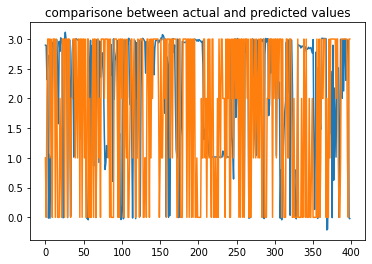

In [62]:
plt.title("comparisone between actual and predicted values")
#plt=plt.figure(200)
plt.plot(predictions)
plt.plot(label_test.target)